In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [8]:
# read the CSV file
data_csv = pd.read_csv('/.../.../covid19_cases.csv')
data_csv.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,29/11/2020,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110
1,28/11/2020,28,11,2020,214,15,Afghanistan,AF,AFG,38041757.0,Asia,6.784650
2,27/11/2020,27,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.395604
3,26/11/2020,26,11,2020,200,12,Afghanistan,AF,AFG,38041757.0,Asia,7.341932
4,25/11/2020,25,11,2020,185,13,Afghanistan,AF,AFG,38041757.0,Asia,7.199983


In [9]:
# group deaths by country
data_csv_deaths_per_country = data_csv.groupby('countriesAndTerritories').agg({'deaths' : 'sum'}).sort_index().head(50)
data_csv_deaths_per_country


,deaths
countriesAndTerritories,
Afghanistan,1763
Albania,787
Algeria,2393
Andorra,76
Angola,345
Anguilla,0
Antigua_and_Barbuda,4
Argentina,38309
Armenia,2142


In [216]:
# group by continent
data_csv_deaths_per_continent = data_csv.groupby('continentExp')['deaths'].sum().sort_values(ascending = False)
data_csv_deaths_per_continent

continentExp
America    724900
Europe     405044
Asia       270969
Africa      51483
Oceania      1128
Other           7
Name: deaths, dtype: int64

In [217]:
# clean zero deaths
data_clean_country= data_csv[~(data_csv['deaths'] < 1)]
data_clean_country

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,29/11/2020,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110
1,28/11/2020,28,11,2020,214,15,Afghanistan,AF,AFG,38041757.0,Asia,6.784650
3,26/11/2020,26,11,2020,200,12,Afghanistan,AF,AFG,38041757.0,Asia,7.341932
4,25/11/2020,25,11,2020,185,13,Afghanistan,AF,AFG,38041757.0,Asia,7.199983
5,24/11/2020,24,11,2020,246,17,Afghanistan,AF,AFG,38041757.0,Asia,6.713675
...,...,...,...,...,...,...,...,...,...,...,...,...
58597,21/06/2020,21,6,2020,7,2,Zimbabwe,ZW,ZWE,14645473.0,Africa,1.413406
58654,25/04/2020,25,4,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.122905
58669,10/04/2020,10,4,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.054624
58670,09/04/2020,9,4,2020,1,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.054624


In [218]:
# sorting by date
data_csv_st = data_csv
data_csv_st["dateRep"] = pd.to_datetime(data_csv_st["dateRep"])
data_csv_st = data_csv_st.sort_values(by="dateRep")
data_csv_st

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
10118,2019-12-31,31,12,2019,0,0,Canada,CA,CAN,3.741104e+07,America,NaN
11807,2019-12-31,31,12,2019,27,0,China,CN,CHN,1.433784e+09,Asia,NaN
35399,2019-12-31,31,12,2019,0,0,Mexico,MX,MEX,1.275755e+08,America,NaN
44185,2019-12-31,31,12,2019,0,0,Qatar,QA,QAT,2.832071e+06,Asia,NaN
38442,2019-12-31,31,12,2019,0,0,Netherlands,NL,NLD,1.728216e+07,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1953,2020-12-11,12,11,2020,10880,348,Argentina,AR,ARG,4.478068e+07,America,318.936684
10453,2020-12-11,12,11,2020,0,0,Cayman_Islands,KY,CYM,6.494800e+04,America,21.555706
6853,2020-12-11,12,11,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,BES,2.598300e+04,America,3.848670
12558,2020-12-11,12,11,2020,1202,11,Costa_Rica,CR,CRI,5.047561e+06,America,261.809615


In [219]:
# deaths of Zimbabwe
conf_data_zw = data_csv_st[data_csv.countriesAndTerritories == 'Zimbabwe']
sum_Zimbabwe_gb_date = conf_data_zw.groupby('dateRep').agg({'deaths' : 'sum'}).sort_index()
sum_Zimbabwe_gb_date



/var/folders/m5/gjzyxs7575z5k5j0xxzrvzlc0000gn/T/ipykernel_4266/4066959178.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conf_data_zw = data_csv_st[data_csv.countriesAndTerritories == 'Zimbabwe']


,deaths
dateRep,
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0
2020-01-08,14
...,...
2020-12-07,5
2020-12-08,0
2020-12-09,2


No handles with labels found to put in legend.


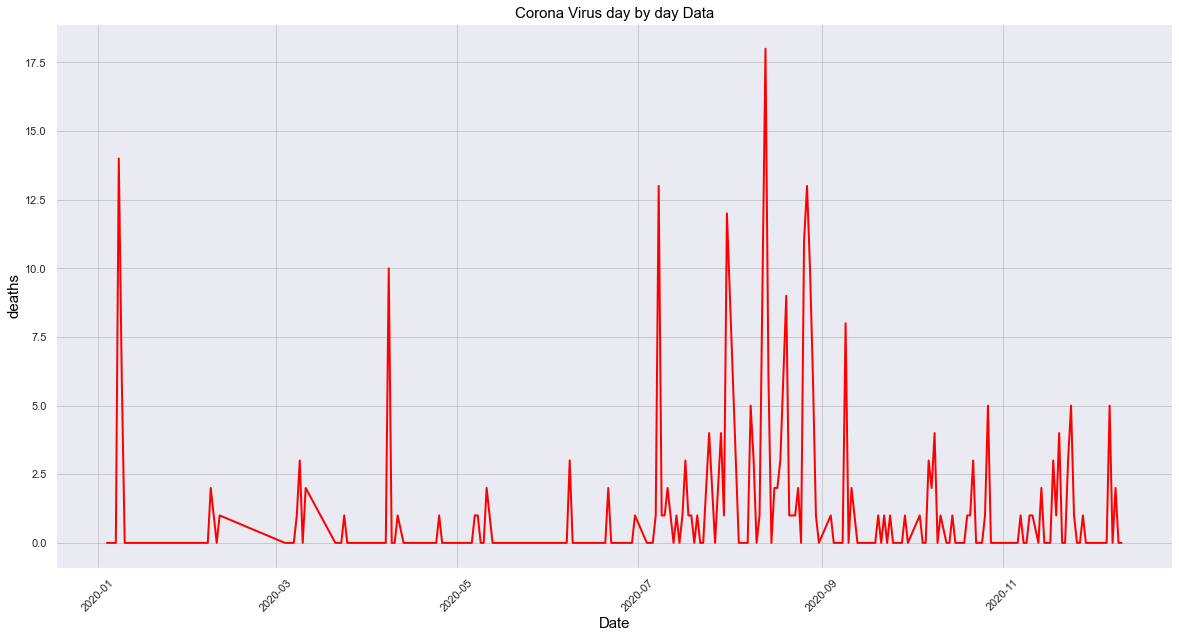

In [212]:
# plot deaths to day

Dates = conf_data_zw.dateRep
deaths = sum_Zimbabwe_gb_date.deaths

fig, ax = plt.subplots(figsize=(20,10), facecolor='white', edgecolor='black')
ax.plot(Dates,deaths, color='red', label='death',lw =2)
font = {'color' : 'black', 'size' : 15}
plt.xlabel('contry' , font)
plt.xlabel('Date' , font)
plt.ylabel('deaths' , font)
plt.title('Corona Virus day by day Data' , font)
plt.xticks(rotation=45)
plt.grid(color= '#ababab', linestyle= '-', linewidth=0.5)
axes.legend(prop={'size' : 15})
plt.show()
